In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

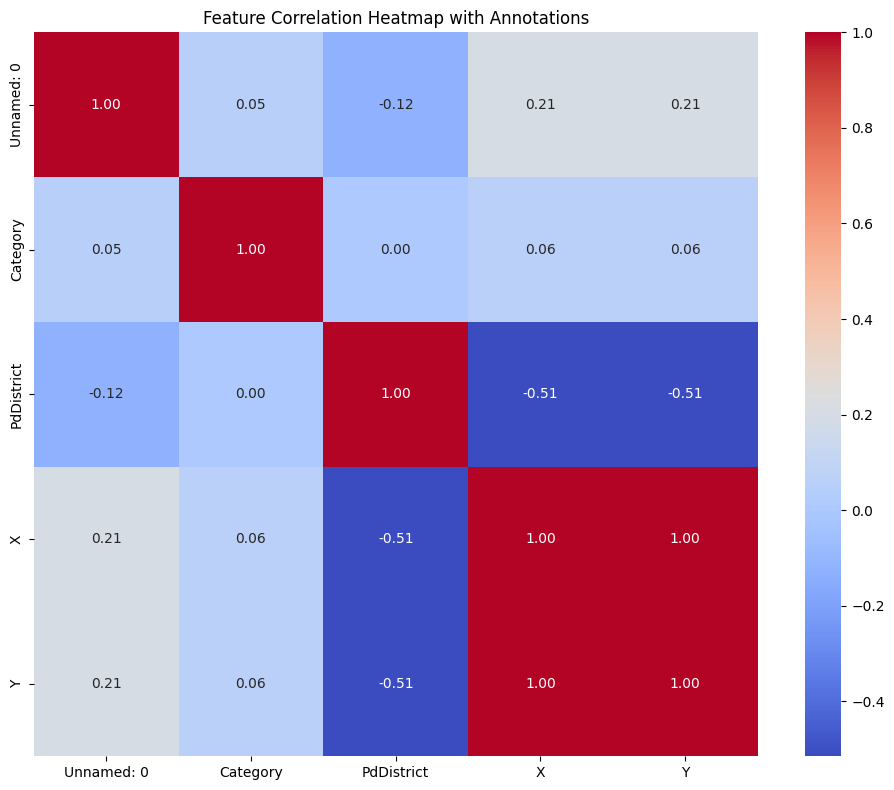

In [2]:
# 2. Load and Prepare the Data
# If your data is in another notebook:
data = pd.read_csv("preprocessed_data.csv")

df = pd.DataFrame(data)

# Keep only numerical columns and drop rows with missing values
df = df.select_dtypes(include=["float64", "int64"]).dropna()

# Quick visualization: correlation heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap with Annotations")
plt.tight_layout()
plt.show()

In [3]:
# 3. Define Features and Target
# Select a proper target column (before convert to categorical)
target_column = df.columns[-1]  # You can modify this if needed

X = df.drop(columns=[target_column])
y = df[target_column]

# Check if the target is suitable for classification (before convert to categorical)
print("Target distribution:")
print(y.value_counts())

Target distribution:
Y
-0.202628    1300
-0.202576     316
 4.935404      67
-0.202593      16
Name: count, dtype: int64


In [4]:
# 3 . Select a proper target column
target_column = df.columns[-1]  # You can modify this if needed
X = df.drop(columns=[target_column])
y = df[target_column]

# If the target variable is continuous, convert it to categorical (binary classification example)
y = pd.cut(y, bins=2, labels=[0, 1])  # Modify this if you have more categories

# Check if the target is suitable for classification
print("Target distribution:")
print(y.value_counts())

Target distribution:
Y
0    1632
1      67
Name: count, dtype: int64


In [5]:
# 4. Train-Test Split and Scaling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 5. Train Classifiers

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)  # Fit with scaled data
y_pred_rf = rf.predict(X_test_scaled)

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)  # Fit with scaled data
y_pred_tree = tree.predict(X_test_scaled)

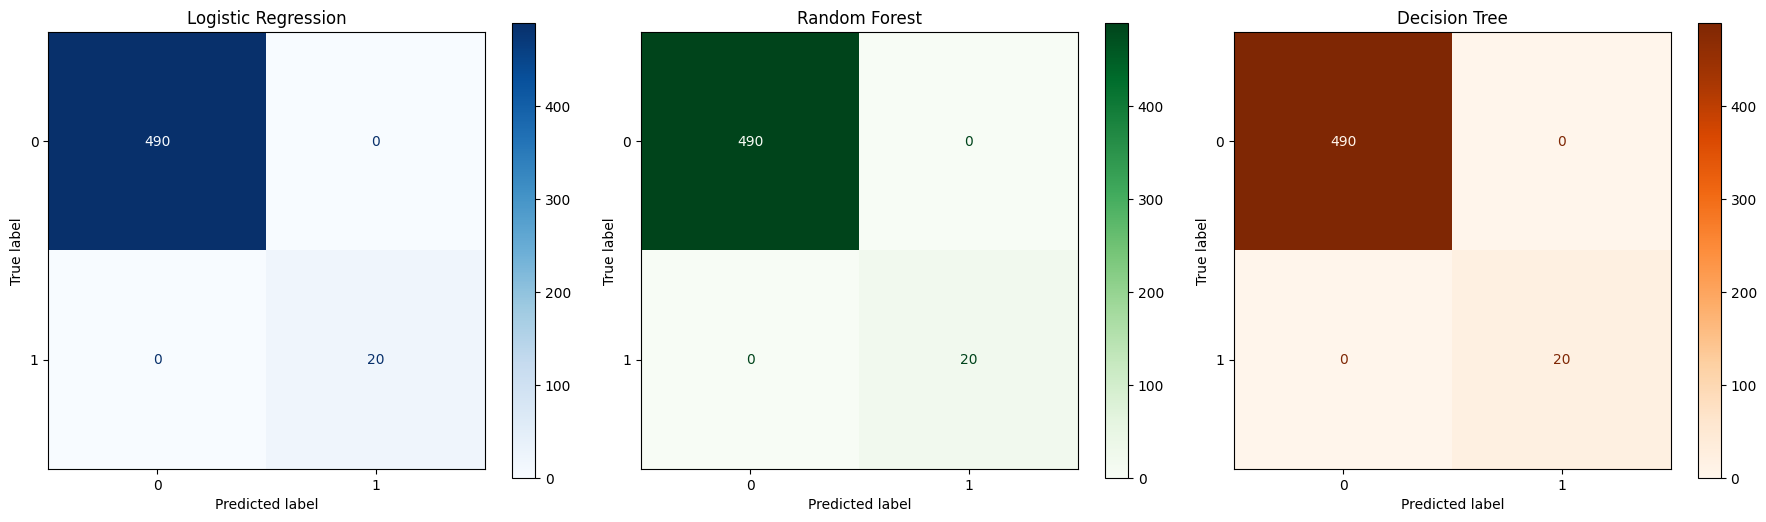

In [7]:
# 6. Confusion Matrix Visualization
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axs[0], cmap="Blues")
axs[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axs[1], cmap="Greens")
axs[1].set_title("Random Forest")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axs[2], cmap="Oranges")
axs[2].set_title("Decision Tree")

plt.tight_layout()
plt.show()

In [8]:
# 7. Classification Reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00        20

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00        20

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00        20

    accuracy                           1.00       510
   macro 